In [1]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(os.path.join("data", "telco-customer-churn.csv"), encoding="utf-8")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
for column in data.columns.difference(["customerID", "TotalCharges"]):
    if data[column].values.dtype == np.object_:
        print(f"{column}: {np.unique(data[column].values)}")

Churn: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
Dependents: ['No' 'Yes']
DeviceProtection: ['No' 'No internet service' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
MultipleLines: ['No' 'No phone service' 'Yes']
OnlineBackup: ['No' 'No internet service' 'Yes']
OnlineSecurity: ['No' 'No internet service' 'Yes']
PaperlessBilling: ['No' 'Yes']
Partner: ['No' 'Yes']
PaymentMethod: ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
PhoneService: ['No' 'Yes']
StreamingMovies: ['No' 'No internet service' 'Yes']
StreamingTV: ['No' 'No internet service' 'Yes']
TechSupport: ['No' 'No internet service' 'Yes']
gender: ['Female' 'Male']


In [7]:
label_encoder = LabelEncoder()
data["Contract"] = label_encoder.fit_transform(data["Contract"].values)

In [8]:
columns_to_change = ["DeviceProtection", "MultipleLines", "OnlineBackup", "OnlineSecurity", "StreamingMovies", "StreamingTV", "TechSupport"]

for column in columns_to_change:
    data[column] = data[column].apply(lambda x: "No" if ((x == "No internet service")
                                                         or (x == "No phone service")
                                                         or (x == "No"))
                                      else "Yes")

In [9]:
data["PaymentMethod"] = data["PaymentMethod"].apply(lambda x: 0 if ((x == "Electronic check")
                                                                    or (x == "Mailed check"))
                                                    else 1)

In [10]:
data["gender"] = data["gender"].apply(lambda x: 0 if (x == "Female") else 1)
data["InternetService"] = data["InternetService"].apply(lambda x: 0 if (x == "No") else 1)

In [11]:
columns = data.columns.drop(["customerID", "tenure", "Contract", "MonthlyCharges", "TotalCharges"])

In [12]:
for column in columns:
    data[column] = data[column].apply(lambda x: 0 if x == "No" else 1)

In [13]:
data["TotalCharges"] = data["TotalCharges"].replace(" ", np.nan)
data.dropna(subset=["TotalCharges"], inplace=True)
data["TotalCharges"] = data["TotalCharges"].astype("float64")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  
 17  

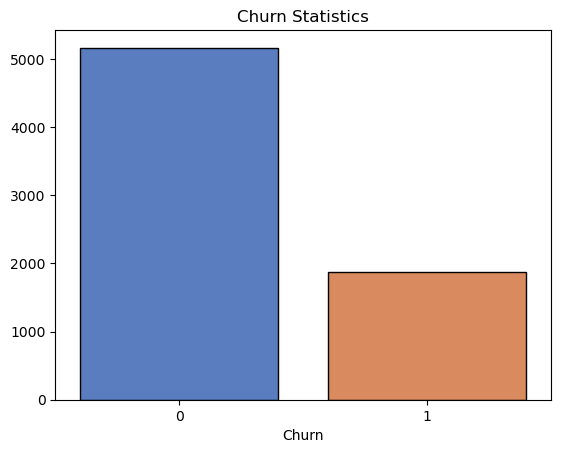

In [15]:
df = pd.DataFrame(data.Churn.value_counts())
sns.barplot(df, x="Churn", y="count", palette="muted", hue="Churn", legend=False, linewidth=1, edgecolor="black")
plt.ylabel("")
plt.title("Churn Statistics")
plt.show()

In [16]:
df = data.drop(["customerID"], axis=1)
corr_matrix = df.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1].dropna()
sorted_pairs = corr_pairs.abs().sort_values(ascending=False)
print(sorted_pairs.head(n=15))

tenure            TotalCharges        0.825880
TotalCharges      tenure              0.825880
tenure            Contract            0.676734
Contract          tenure              0.676734
TotalCharges      MonthlyCharges      0.651065
MonthlyCharges    TotalCharges        0.651065
                  StreamingTV         0.629668
StreamingTV       MonthlyCharges      0.629668
StreamingMovies   MonthlyCharges      0.627235
MonthlyCharges    StreamingMovies     0.627235
StreamingMovies   StreamingTV         0.533380
StreamingTV       StreamingMovies     0.533380
TotalCharges      DeviceProtection    0.522881
DeviceProtection  TotalCharges        0.522881
StreamingMovies   TotalCharges        0.519867
dtype: float64


In [17]:
data = data.drop(["customerID", "tenure", "MonthlyCharges"], axis=1)

In [18]:
X = data.drop(["Churn"], axis=1)
y = data["Churn"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
log_reg = LogisticRegression(C=10.0, class_weight="balanced")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1300
           1       0.44      0.82      0.57       458

    accuracy                           0.69      1758
   macro avg       0.68      0.73      0.66      1758
weighted avg       0.79      0.69      0.70      1758



In [22]:
pd.crosstab(y_test, y_pred, rownames=["Ground truth"], colnames=["Predicted"], margins=True)

Predicted,0,1,All
Ground truth,,,
0,831,469,1300
1,84,374,458
All,915,843,1758


In [23]:
log_reg = LogisticRegression(solver="liblinear")
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1.0, 10, 100],
    "fit_intercept": [True, False],
    "class_weight": ["balanced", "None"]
}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, scoring="roc_auc")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'class_weight': ['balanced', 'None'],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [24]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1300
           1       0.44      0.82      0.57       458

    accuracy                           0.68      1758
   macro avg       0.67      0.73      0.66      1758
weighted avg       0.79      0.68      0.70      1758

